In [1]:
import numpy as np
import pandas as pd

#Import the data file
data = pd.read_csv("Review.csv")

#Preview the data
data.head()

,BusinessId,CoolCount,FunnyCount,NotRecommended,Rating,Text,UsefulCount,UserId,_id
0,long-beach-seafood-singapore,1,0,False,5,Been coming here for more than a decade. Long ...,1,mMjxhRn4h0LD1_jI3RT4cQ,ENx8ZXpulmX5_AfCOp_U3A
1,long-beach-seafood-singapore,3,0,False,5,I've been coming here with my boyfriend to onl...,4,tAr3zFVXoM1K2PrbyCdcTA,Tjd32RIUDeOJrYpJ9J6_GA
2,long-beach-seafood-singapore,2,1,False,5,MUST GO! Your life isn't complete without goin...,1,1-5YghuD_7sLuD01f6hrJw,wYuRHgUSBTm6D8B-HrSpNg
3,long-beach-seafood-singapore,0,0,False,3,"Excellent service, our waiter was always aroun...",0,ZAaT3T_Yd1re0Nt_MOW7AA,lisryzBzdpf4KNXfx6-3Fg
4,long-beach-seafood-singapore,0,0,False,4,Try the Chilli crab. Its gravy was on the swee...,1,oRMf6hs2lgU3bIr_fF_5IA,thceOS2dozAixh8Qu09gOg


In [2]:
#Select only those important columns for our project
df1 = data[['_id','UserId','BusinessId','Rating','Text']]
print(df1)


                          _id                  UserId  \
0      ENx8ZXpulmX5_AfCOp_U3A  mMjxhRn4h0LD1_jI3RT4cQ   
1      Tjd32RIUDeOJrYpJ9J6_GA  tAr3zFVXoM1K2PrbyCdcTA   
2      wYuRHgUSBTm6D8B-HrSpNg  1-5YghuD_7sLuD01f6hrJw   
3      lisryzBzdpf4KNXfx6-3Fg  ZAaT3T_Yd1re0Nt_MOW7AA   
4      thceOS2dozAixh8Qu09gOg  oRMf6hs2lgU3bIr_fF_5IA   
5      7yAZ_47K_aJQlWGM79mYCA  oeAhRa8yFa9jtrhaHnOyxQ   
6      NtBCMPJH_n62YA9Zy83jlw  8aBKh52ePGd3OG8di20wdw   
7      5uOt1hm1LxR-H2NJEs1Vgw  pMltyeuU4SjT6Y8YVy7HBA   
8      qWZ0yoP48ZLoGvj9QVc4TA  fZaWWxwwHGtH-8Vhx7qE_Q   
9      MuIvIPQiYBXJDhicWjSX_g  m7rbZtL4b8du326Ng43SiA   
10     EphGs01wv824ChsIm-bNxA  Q1oMmm7tKPOzA7_gqcV4zg   
11     sVMv2XaWvEn3gGi8dnO3lA  Vtdm-QpN5yYxT-O00cuqFg   
12     Z79DT0ECtm-1YDXFE9fEzA  wwdamcY73iJTyhl-3gGOJw   
13     LeFrcXzAtIG26HKtYdpD6w  11R2R4nyRpF6nqlXH-JeGQ   
14     i57jsdlQtxiSYWovohElAg  ITWi6Z_nZ8mmiSzpSUrDKg   
15     CQ1njdQNZV-Z06VwDeC_5w  3S53VaMDPy8Lywk2TuPb4A   
16     mbIUMsDU3CjAcq9bgwfwrA  

In [3]:
#Create a class for a review 
class Review:
  def __init__(self, reviewId, userId, businessId, rating, text):
    self.reviewId = reviewId
    self.userId = userId
    self.businessId = businessId
    self.rating = rating
    self.text = text
#Do we need a review object? Will it make it easier?

In [4]:
#Logic to Follow
#1. From Pandas dataframe, convert to a corpus of reviews
#2. For each review, split into sentences
#3. Do preprocessing on each of the sentences? 
#    -convert to lowercase
#    -remove weird symbols (Regrex patterns)
#    -stopwords
#    -stemming / lemmatization
#4. Convert each sentences into a vector model
#5. Cluster the sentences (Kmeans VS Hierarchial)
#6. Categorize the clusters (Price/Quality/Ambience etc)
#7. Publish results via Dashboard(???)


In [26]:
# Make a directory to store the corpus files
# Creating individual review files 
# Need to delete Data folder before adding the files again**
import os
import shutil
import timeit
from nltk.tokenize import sent_tokenize
import collections

def createFolder(directory):
    try:
        if os.path.exists(directory):
            shutil.rmtree(directory)
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        

# Create a folder as a corpus
# Creates a folder in the current directory called Data
createFolder('./Data/')

allSentenceData = []
allSentenceReviewId = []
allSentenceBusinessId = []
allSentenceRating = []

reviewSentenceList = []

def CreateCorpusFromDataFrame(corpusfolder,df1):
    
    reviewPartDictionary = collections.OrderedDict();
    
    
    for index, r in df1.iterrows():
        reviewId = r['_id']
        businessId = r['BusinessId']
        userId = r['UserId']
        rating = r['Rating']
        body = r['Text']
        
        sentenceList = sent_tokenize(body)
        numberOfSentences = len(sentenceList)
        
        reviewPartDictionary[str(reviewId)] = numberOfSentences;
        
        for i in range(0, numberOfSentences):
            fname=str(reviewId) + '#' + str(i) + '.txt'
            reviewSentenceList.append(fname)
            corpusfile=open(corpusfolder+'/'+fname,'a')
            corpusfile.write(sentenceList[i])
            corpusfile.close()
            allSentenceData.append(sentenceList[i])
            allSentenceReviewId.append(reviewId)
            allSentenceBusinessId.append(businessId)
            allSentenceRating.append(rating)
            
        
    return reviewPartDictionary
        
start_time = timeit.default_timer()
reviewDict = CreateCorpusFromDataFrame('./Data',df1)
elapsed = timeit.default_timer() - start_time
print("Time Taken: "+ str(elapsed))

Time Taken: 54.99732347999998


In [6]:
# Prepare the corpus
# This code will take a long while to run...
import timeit
start_time = timeit.default_timer()

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

from preprocess import *
#Load all the files from our Data folder
corpus = load_corpus('Data')

#This is the docs returned after stop_words/stemming etc..
docs = corpus2docs(corpus)

#This is the most important vocabulary/dictionary which gives us a list of all the 'unique' words
dictionary = gensim.corpora.Dictionary(docs)

#This is an array list of each tfidf[vec] (vector docment against tfidf)
vecs = docs2vecs(docs, dictionary)
print(len(docs))

elapsed = timeit.default_timer() - start_time
print("Time Taken: "+ str(elapsed))

130964
Time Taken: 206.39746002500033


In [7]:
#Function To Preprocess allSentenceData
import nltk
import re
import timeit
start_time = timeit.default_timer()

stop_list = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
# print(allSentenceData[0:20])

# def preprocessDocs(docList):
#     docs2 = [doc.lower() for doc in docList]
#     docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
#     docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
#     docs5 = [[stemmer.stem(w) for w in doc] for doc in docs4]
#     return docs5

# processedDocs = preprocessDocs(allSentenceData)
# print(processedDocs[0:20])

# def tokenize_only(text):
#     # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
#     tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
#     filtered_tokens = []
#     # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
#     for token in tokens:
#         token.lower()
#         if re.search('^[a-z]+$', token):
#             filtered_tokens.append(token)
#     return filtered_tokens


# def tokenize_and_stem(text):
#     # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
#     tokens = [word for word in nltk.word_tokenize(text)]
#     filtered_tokens = []
#     # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
#     for token in tokens:
#         token.lower()
#         if re.search('^[a-z]+$', token):
#             filtered_tokens.append(token)
#     stems = [stemmer.stem(t) for t in filtered_tokens]
#     return stems

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('^[a-z]+$', token.lower()):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('^[a-z]+$', token.lower()):
            filtered_tokens.append(token)
    return filtered_tokens

elapsed = timeit.default_timer() - start_time
print("Time Taken: "+ str(elapsed))

Time Taken: 0.0036969150005461415


In [8]:
#
#  Dataframe of vocabulary - Stemmed, tokenized
#

import timeit
start_time = timeit.default_timer()

totalvocab_stemmed = []
totalvocab_tokenized = []
for sentence in allSentenceData:
    allwords_stemmed = tokenize_and_stem(sentence) # for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) # extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(sentence)
    totalvocab_tokenized.extend(allwords_tokenized)
    
print("=====  Tonkenized ==== ")
print(len(totalvocab_tokenized))

print("=====  Stemmed ==== ")
print(len(totalvocab_stemmed))  

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

# print(vocab_frame)


elapsed = timeit.default_timer() - start_time
print("Time Taken: "+ str(elapsed))

=====  Tonkenized ==== 
1893497
=====  Stemmed ==== 
1893497
Time Taken: 114.1017704370006


In [9]:
#Testing out other python library with kmeans and viz
#https://radimrehurek.com/gensim/sklearn_api/w2vmodel.html
#https://www.kaggle.com/dipikabaad0107/elbow-curve-for-text-clustering
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import nltk
import re
import pylab as pl

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA 

from sklearn.feature_extraction.text import TfidfVectorizer

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#Small data set
dataLimit = 2000
smallData = allSentenceData[0:dataLimit]

vectorizer = TfidfVectorizer(stop_words='english',use_idf=True,tokenizer=tokenize_and_stem)
tfidf_matrix = vectorizer.fit_transform(smallData)
print(tfidf_matrix.shape)

terms = vectorizer.get_feature_names() #Get all the features / vocab i think
# print(terms)


(2000, 3045)


/Users/wilson/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


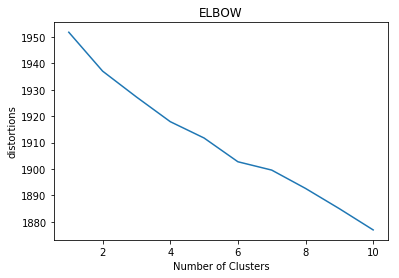

In [10]:
#This method gives me a weird graph that is negative
# Nc = range(1, 50)
# kmeans = [KMeans(n_clusters=i) for i in Nc]
# kmeans

# score = [kmeans[i].fit(tfidf_matrix).score(tfidf_matrix) for i in range(len(kmeans))]
# score

# pl.plot(Nc,score)
# pl.xlabel('Number of Clusters')
# pl.ylabel('Score')
# pl.title('Elbow Curve')
# pl.show()

# Follow the TA way and some tutorial online LOL
# https://www.kaggle.com/dipikabaad0107/elbow-curve-for-text-clustering

distortions = []
K = range(1,11)
for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(tfidf_matrix)
    distortions.append(kmeans.inertia_)
pl.plot(K,distortions)
pl.title('ELBOW')
pl.xlabel('Number of Clusters')
pl.ylabel('distortions')
pl.show()






# from sklearn.cluster import KMeans
# from sklearn import metrics
# from scipy.spatial.distance import cdist

# distortions = []
# K = range(1,10)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(tfidf_matrix)
#     kmeanModel.fit(tfidf_matrix)
#     distortions.append(sum(np.min(cdist(tfidf_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tfidf_matrix.shape[0])

In [12]:
# Based on the elbow method, I determine the optimal number to be 4/5

from sklearn.cluster import KMeans

num_clusters = 6

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 1.97 s, sys: 38.4 ms, total: 2.01 s
Wall time: 2.07 s


In [13]:
for i in range(0 ,500):
    print("Cluster: " + str(clusters[i]) +" " + smallData[i])

Cluster: 0 Been coming here for more than a decade.
Cluster: 2 Long beach has the best pepper crab hands down.... after eating and sampling pepper crabs round the island, Long Beach really has the best tasting pepper crabs around.
Cluster: 2 This round, we ordered white pepper Alaskan snow crab.
Cluster: 2 The huge Alaskan crabs were cooked to perfection, in a buttery creamy pepper sauce.
Cluster: 2 The chilli crabs are tasty but i would recommend the pepper crabs.
Cluster: 2 Other dishes tasted great but didnt taste as savory as their signature pepper crab which they invented.
Cluster: 2 I gave them 5 stars for their fantastic pepper crabs that never fails to satisfy.
Cluster: 2 I've been coming here with my boyfriend to only order CHILLI CRAB, *hyperventilating right now* the deliiiiicous razor clams and steamed buns.
Cluster: 0 We needed no duck, fish or whatnots.
Cluster: 2 Just the Chilli crab and its friends to go along with.
Cluster: 1 So first we ordered the razor clams as our 

Cluster: 1 We came for lunch on a weekday, around 11:40, so there was no wait.
Cluster: 0 My pancakes were fluffy and moist, and my friend's country breakfast also looked delicious.
Cluster: 1 My only complaint is with the service, which was rather slow.
Cluster: 4 We had to flag down the server a couple times to order our food, even though the restaurant was only half full.
Cluster: 0 Will def be back again soon!
Cluster: 2 I missed checking this place out in New York so I was really happy to find that it's now in Singapore!


In [19]:
# ===================
# K MEANS CLUSTERING
# ===================

import pandas as pd
import os

reviews = { 'businessId': allSentenceBusinessId[0:dataLimit], 'rating': allSentenceRating[0:dataLimit], 'sentence': allSentenceData[0:dataLimit], 'reviewId':allSentenceReviewId[0:dataLimit], 'cluster': clusters[0:dataLimit] }

frame = pd.DataFrame(reviews, index = [clusters[0:dataLimit]] , columns = ['rating', 'sentence', 'reviewId', 'businessId', 'cluster'])

exists = os.path.isfile('./output.csv')
if exists:
    os.remove("output.csv")

for index, row in frame.iterrows():
    rowFrame = row.to_frame()
    rowFrame = rowFrame.transpose()
    rowFrame.to_csv("output.csv", mode='a', header=False)
    
print("DONE")

DONE


In [20]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms_words = []
terms_values = {}

for i in range(num_clusters):
#     print("Cluster %d words:" % i, end='')
    print("Loading Cluster %d words..." %i)
    wordList = [vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0] for ind in order_centroids[i, :10]]
    terms_values[i] = wordList
        
#         print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
#     print()
#     print("Cluster %d titles:" % i, end='')
#     for title in frame.ix[i]['reviewId'].values.tolist():
# #         print(' %s,' % title, end='')
#         pass
#     print()
#     print()


terms_df = pd.DataFrame(terms_values)
FILE_NAME = "output2.csv"
print("Exporting to csv file: %s" %FILE_NAME)


terms_df.to_csv(FILE_NAME)

print("Complete")


    

Top terms per cluster:

Loading Cluster 0 words...

Loading Cluster 1 words...

Loading Cluster 2 words...

Loading Cluster 3 words...

Loading Cluster 4 words...

Loading Cluster 5 words...

Exporting to csv file: output2.csv
Complete


In [21]:
#import the consine similiarity
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)



In [32]:
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = pl.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=reviewSentenceList);

pl.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

pl.tight_layout() #show plot with tight layout
#uncomment below to save figure
pl.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [28]:
print(reviewSentenceList[0:20])

['ENx8ZXpulmX5_AfCOp_U3A#0.txt', 'ENx8ZXpulmX5_AfCOp_U3A#1.txt', 'ENx8ZXpulmX5_AfCOp_U3A#2.txt', 'ENx8ZXpulmX5_AfCOp_U3A#3.txt', 'ENx8ZXpulmX5_AfCOp_U3A#4.txt', 'ENx8ZXpulmX5_AfCOp_U3A#5.txt', 'ENx8ZXpulmX5_AfCOp_U3A#6.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#0.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#1.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#2.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#3.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#4.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#5.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#6.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#7.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#8.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#9.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#10.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#11.txt', 'Tjd32RIUDeOJrYpJ9J6_GA#12.txt']


In [37]:
print(linkage_matrix)

[[4.19000000e+02 6.30000000e+02 0.00000000e+00 2.00000000e+00]
 [2.00000000e+01 1.59000000e+02 0.00000000e+00 2.00000000e+00]
 [2.89000000e+02 2.00100000e+03 0.00000000e+00 3.00000000e+00]
 ...
 [3.97700000e+03 3.99400000e+03 1.47580033e+01 3.60000000e+02]
 [3.96000000e+03 3.99500000e+03 1.60432773e+01 1.64000000e+03]
 [3.99600000e+03 3.99700000e+03 1.96467137e+01 2.00000000e+03]]
